In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
def dataset(dataset_dir, IMAGE_SIZE = (256, 256), BATCH_SIZE = 32 ,VALIDATION_SPLIT = 0.2):
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    )
    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        dataset_dir,
        validation_split=VALIDATION_SPLIT,
        subset="validation",
        seed=42,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
    )
    return train_dataset, validation_dataset



In [25]:

train_dataset, validation_dataset = dataset('asl_alphabet_train',IMAGE_SIZE=(128,128),BATCH_SIZE=128)
class_names = train_dataset.class_names
print(class_names)

Found 87000 files belonging to 29 classes.
Using 69600 files for training.
Found 87000 files belonging to 29 classes.
Using 17400 files for validation.
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


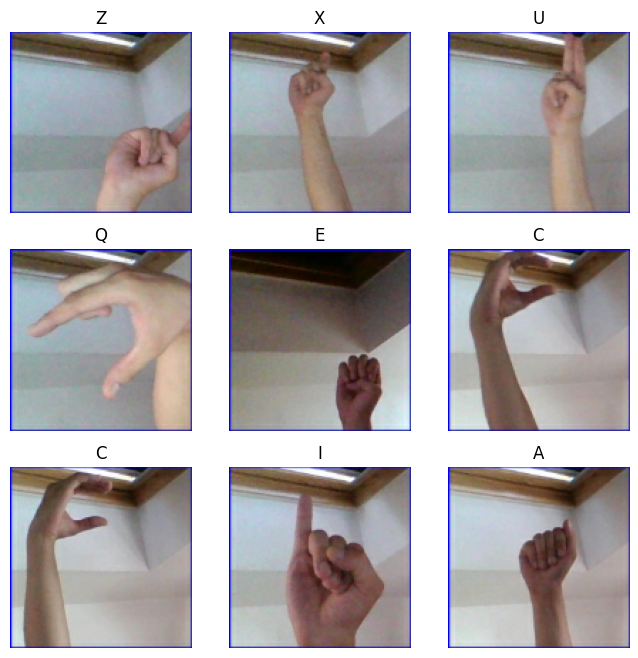

In [26]:
plt.figure(figsize=(8, 8))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [24]:
#generate a pie chart of the distribution of the classes
def pie_chart(dataset):
    y = []
    for images, labels in dataset:
        y = y + list(labels.numpy())
    y = pd.Series(y)
    plt.figure(figsize=(10,10))
    y.value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.show()

# pie_chart(train_dataset)

In [29]:
def buildModel():
    model = Sequential()
    model.add(Conv2D(128, (3, 3),strides=1,padding='same', activation='relu', input_shape=(128, 128, 3)))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2), padding='same'))
    
    model.add(Conv2D(64, (3, 3),strides=1,padding='same', activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2), padding='same'))
    
    model.add(Conv2D(32, (3, 3),strides=1,padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2), padding='same'))
    
    model.add(Conv2D(16, (3, 3),strides=1,padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2, 2), strides=(2, 2), padding='same'))
    
    model.add(Flatten())
    
    model.add(Dense(8*8*16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(29, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [30]:
model=buildModel()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 batch_normalization_16 (Ba  (None, 128, 128, 128)     512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 64)        73792     
                                                                 
 dropout_10 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 batch_normalization_17 (Ba  (None, 64, 64, 64)       

In [31]:
nn=model.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10


   8/2175 [..............................] - ETA: 1:03:51 - loss: 4.3706 - accuracy: 0.0508

KeyboardInterrupt: 